# Import Necessary libreries

In [1]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_auc_score,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import plot_confusion_matrix
from matplotlib.colors import ListedColormap
zero_one_colourmap = ListedColormap(('red', 'green'))
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [2]:
from sklearn.tree import plot_tree
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,VotingClassifier,VotingRegressor

# Import dataset

In [3]:
train_data=pd.read_csv("./train.csv")
test_data=pd.read_csv("./test.csv")

In [4]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Data Understanding

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_data.shape

(891, 12)

## Null or MIssing values  Treatments

In [8]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

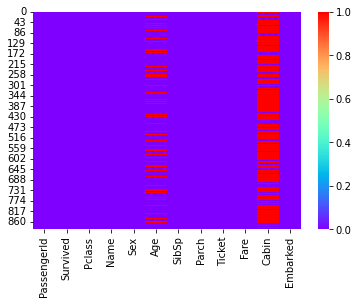

In [9]:
sns.heatmap(data=train_data.isna(),cmap="rainbow")

In [10]:
test_data.shape

(418, 11)

In [11]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:>

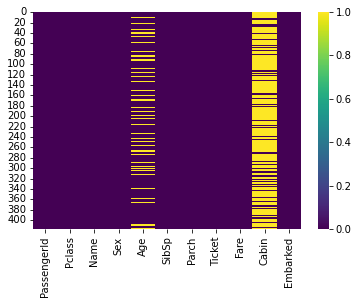

In [12]:
sns.heatmap(data=test_data.isna(),cmap="viridis")

In [13]:
train_data=train_data.drop(labels=['Cabin'],axis= 1)
test_data=test_data.drop(labels=['Cabin'],axis= 1)

In [14]:
train_data.shape

(891, 11)

In [15]:
test_data.shape

(418, 10)

In [16]:
train_data["Age"].mean()

29.69911764705882

In [17]:
train_data["Age"]=train_data["Age"].fillna(train_data["Age"].mean())

In [18]:
test_data["Age"]=test_data["Age"].fillna(test_data["Age"].mean())

In [19]:
train_data["Embarked"]=train_data["Embarked"].fillna(train_data["Embarked"].mode()[0])
test_data["Embarked"]=test_data["Embarked"].fillna(test_data["Embarked"].mode()[0])

In [20]:
test_data["Fare"]=test_data["Fare"].fillna(test_data["Fare"].mean())

In [21]:
test_data.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [22]:
train_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

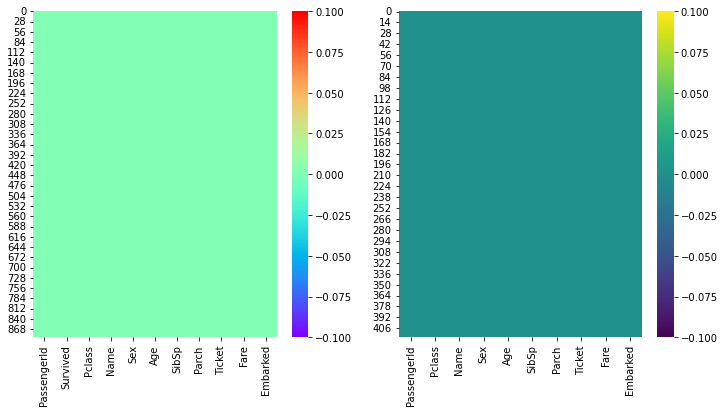

In [23]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.heatmap(data=train_data.isna(),cmap="rainbow")
plt.subplot(1,2,2)
sns.heatmap(data=test_data.isna(),cmap="viridis")
plt.show()

## Outliers Treatments

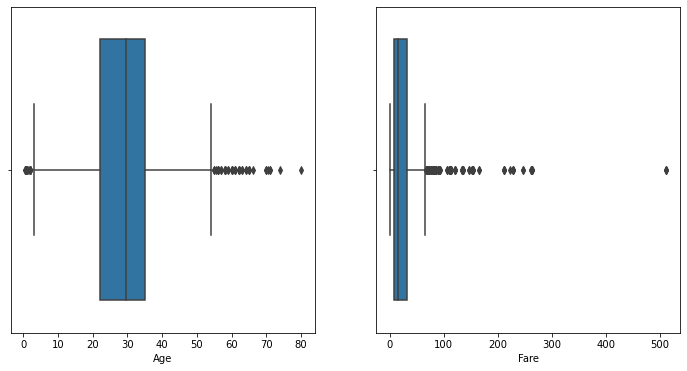

In [24]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(x=train_data["Age"],y=None,data=train_data,color=None,)
plt.subplot(1,2,2)
sns.boxplot(x=train_data["Fare"],y=None,data=train_data,color=None,)
plt.show()

In [25]:
q3,q1=np.percentile(train_data["Age"],[75,25])
iqr=q3-q1
lw_whiskers=q1-(1.5*iqr)
up_whiskers=q3+(1.5*iqr)
train_data["Age"]=train_data["Age"].clip(lower=lw_whiskers)
train_data["Age"]=train_data["Age"].clip(upper=up_whiskers)

In [26]:
q3,q1=np.percentile(train_data["Fare"],[75,25])
iqr=q3-q1
lw_whiskers=q1-(1.5*iqr)
up_whiskers=q3+(1.5*iqr)
#train_data["Fare"]=train_data["Fare"].clip(lower=lw_whiskers)
train_data["Fare"]=train_data["Fare"].clip(upper=up_whiskers)

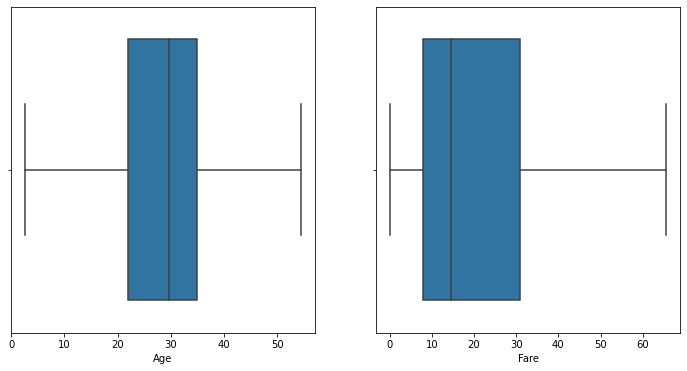

In [27]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(x=train_data["Age"],y=None,data=train_data,color=None,)
plt.subplot(1,2,2)
sns.boxplot(x=train_data["Fare"],y=None,data=train_data,color=None,)
plt.show()

## test data

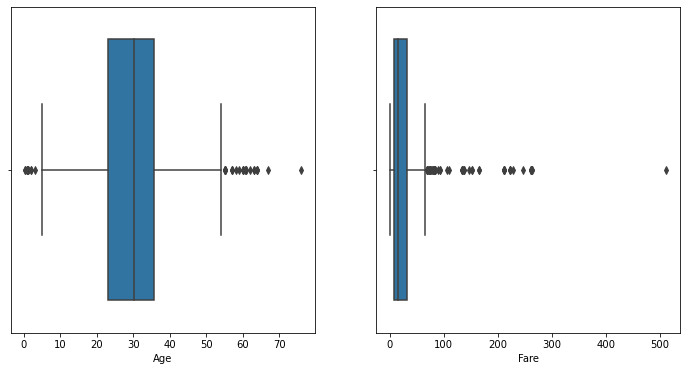

In [28]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(x=test_data["Age"],y=None,data=test_data,color=None,)
plt.subplot(1,2,2)
sns.boxplot(x=test_data["Fare"],y=None,data=test_data,color=None,)
plt.show()

In [29]:
q3,q1=np.percentile(test_data["Age"],[75,25])
iqr=q3-q1
lw_whiskers=q1-(1.5*iqr)
up_whiskers=q3+(1.5*iqr)
test_data["Age"]=test_data["Age"].clip(lower=lw_whiskers)
test_data["Age"]=test_data["Age"].clip(upper=up_whiskers)

In [30]:
q3,q1=np.percentile(test_data["Fare"],[75,25])
iqr=q3-q1
lw_whiskers=q1-(1.5*iqr)
up_whiskers=q3+(1.5*iqr)
#test_data["Fare"]=test_data["Fare"].clip(lower=lw_whiskers)
test_data["Fare"]=test_data["Fare"].clip(upper=up_whiskers)

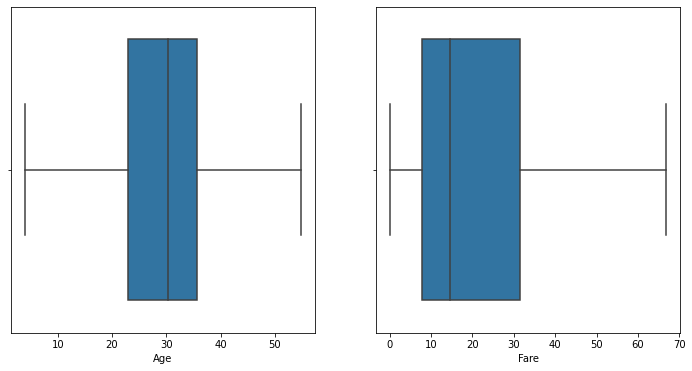

In [31]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(x=test_data["Age"],y=None,data=test_data,color=None,)
plt.subplot(1,2,2)
sns.boxplot(x=test_data["Fare"],y=None,data=test_data,color=None,)
plt.show()

In [32]:
train_data.duplicated().sum()

0

In [33]:
test_data.duplicated().sum()

0

In [34]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [35]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.6344,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [36]:
train_data=train_data.drop(columns=["PassengerId","Name","Ticket"],axis=1)

In [37]:
test_data=test_data.drop(columns=["PassengerId","Name","Ticket"],axis=1)

In [38]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,65.6344,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [39]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.500,0,0,7.8292,Q
1,3,female,47.000,1,0,7.0000,S
2,2,male,54.875,0,0,9.6875,Q
3,3,male,27.000,0,0,8.6625,S
4,3,female,22.000,1,1,12.2875,S


In [40]:
train_data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [41]:
train_data["Sex"]=train_data["Sex"].astype("category")
train_data["Embarked"]=train_data["Embarked"].astype("category")

In [42]:
test_data["Sex"]=test_data["Sex"].astype("category")
test_data["Embarked"]=test_data["Embarked"].astype("category")

In [43]:
le_encoder=LabelEncoder()

In [44]:
train_data.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,65.6344,C
2,1,3,female,26.0,0,0,7.9250,S


In [45]:
dummy_1=pd.get_dummies(train_data["Embarked"],dtype=int)
dummy_2=pd.get_dummies(train_data["Pclass"],prefix="Pclass",dtype=int)
train_data["Sex"]=le_encoder.fit_transform(train_data["Sex"])

In [46]:
train_data=train_data.join([dummy_1,dummy_2])

In [47]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S,Pclass_1,Pclass_2,Pclass_3
0,0,3,1,22.000000,1,0,7.2500,S,0,0,1,0,0,1
1,1,1,0,38.000000,1,0,65.6344,C,1,0,0,1,0,0
2,1,3,0,26.000000,0,0,7.9250,S,0,0,1,0,0,1
3,1,1,0,35.000000,1,0,53.1000,S,0,0,1,1,0,0
4,0,3,1,35.000000,0,0,8.0500,S,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,S,0,0,1,0,1,0
887,1,1,0,19.000000,0,0,30.0000,S,0,0,1,1,0,0
888,0,3,0,29.699118,1,2,23.4500,S,0,0,1,0,0,1
889,1,1,1,26.000000,0,0,30.0000,C,1,0,0,1,0,0


In [48]:
train_data=train_data.drop(columns=["Pclass","Embarked"])

In [49]:
train_data.head()

,Survived,Sex,Age,SibSp,Parch,Fare,C,Q,S,Pclass_1,Pclass_2,Pclass_3
0,0,1,22.0,1,0,7.2500,0,0,1,0,0,1
1,1,0,38.0,1,0,65.6344,1,0,0,1,0,0
2,1,0,26.0,0,0,7.9250,0,0,1,0,0,1
3,1,0,35.0,1,0,53.1000,0,0,1,1,0,0
4,0,1,35.0,0,0,8.0500,0,0,1,0,0,1


In [50]:
dummy_3=pd.get_dummies(test_data["Embarked"],dtype=int)
dummy_4=pd.get_dummies(test_data["Pclass"],prefix="Pclass",dtype=int)
test_data["Sex"]=le_encoder.fit_transform(test_data["Sex"])

In [51]:
test_data=test_data.join([dummy_3,dummy_4])

In [52]:
test_data=test_data.drop(columns=["Pclass","Embarked"])

In [53]:
test_data.head()

,Sex,Age,SibSp,Parch,Fare,C,Q,S,Pclass_1,Pclass_2,Pclass_3
0,1,34.500,0,0,7.8292,0,1,0,0,0,1
1,0,47.000,1,0,7.0000,0,0,1,0,0,1
2,1,54.875,0,0,9.6875,0,1,0,0,1,0
3,1,27.000,0,0,8.6625,0,0,1,0,0,1
4,0,22.000,1,1,12.2875,0,0,1,0,0,1


## Correlation Matrix and Heatmap

In [54]:
train_data.corr()

,Survived,Sex,Age,SibSp,Parch,Fare,C,Q,S,Pclass_1,Pclass_2,Pclass_3
Survived,1.000000,-0.543351,-0.065857,-0.035322,0.081629,0.317430,0.168240,0.003650,-0.149683,0.285904,0.093349,-0.322308
Sex,-0.543351,1.000000,0.077907,-0.114631,-0.245489,-0.234969,-0.082853,-0.074115,0.119224,-0.098013,-0.064746,0.137143
Age,-0.065857,0.077907,1.000000,-0.238735,-0.186087,0.137498,0.032908,-0.016155,-0.018662,0.317300,0.011351,-0.282626
SibSp,-0.035322,-0.114631,-0.238735,1.000000,0.414838,0.332021,-0.059528,-0.026354,0.068734,-0.054582,-0.055932,0.092548
Parch,0.081629,-0.245489,-0.186087,0.414838,1.000000,0.292616,-0.011069,-0.081228,0.060814,-0.017633,-0.000734,0.015790
Fare,0.317430,-0.234969,0.137498,0.332021,0.292616,1.000000,0.263603,-0.171339,-0.123104,0.739714,-0.089678,-0.564356
C,0.168240,-0.082853,0.032908,-0.059528,-0.011069,0.263603,1.000000,-0.148258,-0.782742,0.296423,-0.125416,-0.153329
Q,0.003650,-0.074115,-0.016155,-0.026354,-0.081228,-0.171339,-0.148258,1.000000,-0.499421,-0.155342,-0.127301,0.237449
S,-0.149683,0.119224,-0.018662,0.068734,0.060814,-0.123104,-0.782742,-0.499421,1.000000,-0.161921,0.189980,-0.015104
Pclass_1,0.285904,-0.098013,0.317300,-0.054582,-0.017633,0.739714,0.296423,-0.155342,-0.161921,1.000000,-0.288585,-0.626738


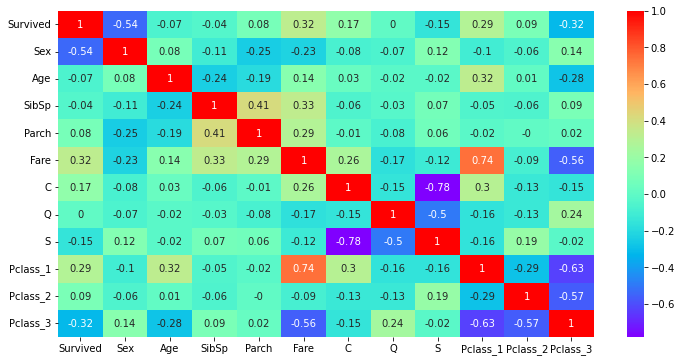

In [55]:
plt.figure(figsize=(12,6))
sns.heatmap(data=train_data.corr().round(2),annot=True,cmap="rainbow")
plt.show()

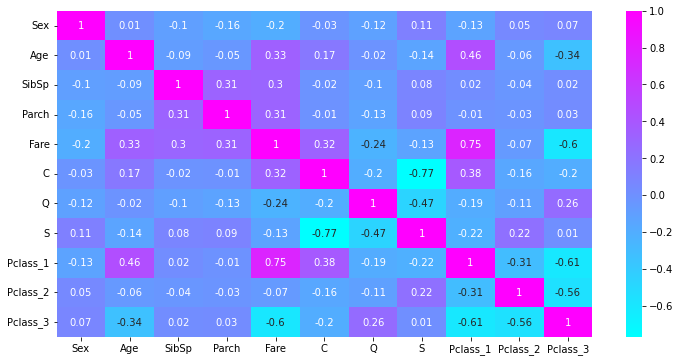

In [56]:
plt.figure(figsize=(12,6))
sns.heatmap(data=test_data.corr().round(2),annot=True,cmap="cool")
plt.show()

### Checking for Imbalanced Dataset

In [57]:
train_data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:>

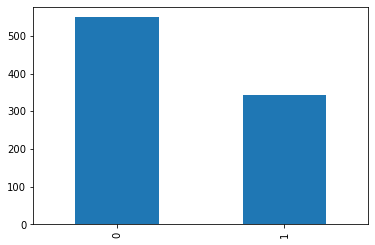

In [58]:
train_data.Survived.value_counts().plot(kind="bar")

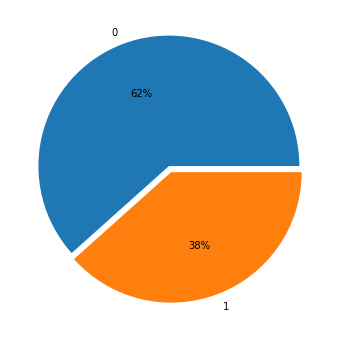

In [59]:
plt.figure(figsize=(10,6))
plt.pie(x=train_data.Survived.value_counts(),explode=[0.03,0.02],labels=["0","1"],autopct='%1.0f%%')
plt.show()

In [60]:
X=train_data.drop(columns=["Survived"],axis=1)
y=train_data[["Survived"]]

# Model Building

## Support Vector Machine

### linear kernel

Overall Accuracy :  0.7868
Precision        :  0.742
Recall           :  0.6813
AUC Score        :  0.7669
Confusion Matrix :


Text(0.5, 1.0, 'Prediction Vs Actual')

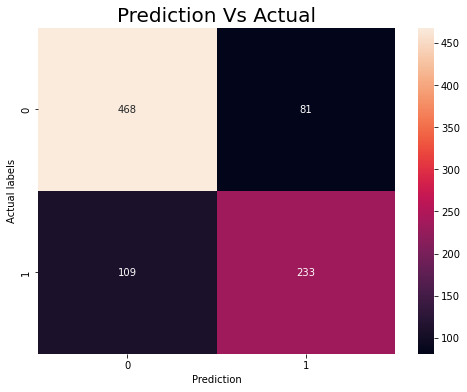

In [61]:
svc_classifier_1 = SVC(kernel='linear',class_weight={1 : 1.63,  0 :1})
svc_classifier_1.fit(X,y)
y_pred = svc_classifier_1.predict(X)

print("Overall Accuracy : ",round(accuracy_score(y,y_pred),4))
print("Precision        : ",round(precision_score(y,y_pred),4))
print("Recall           : ",round(recall_score(y,y_pred),4))
print("AUC Score        : ",round(roc_auc_score(y,y_pred),4))
print("Confusion Matrix :")

plt.figure(figsize = (8,6))
confu_matrix = confusion_matrix(y,y_pred)
sns.heatmap(data = confu_matrix,
            annot=True,fmt='g'
            )
plt.xlabel("Prediction")
plt.ylabel("Actual labels")
plt.title("Prediction Vs Actual",size = 20)

## Random Forest Classifier

In [62]:
model=RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=None,max_features='auto',random_state=None,
 class_weight={1 : 1.63,  0 :1})

In [63]:
model.fit(X,y)

RandomForestClassifier(class_weight={0: 1, 1: 1.63}, criterion='entropy')

In [64]:
y_pred=model.predict(X)

In [65]:
print('Accuracy Score : ',accuracy_score(y,y_pred))
print('-------------------------------------------')
print('Confusion Matrix:\n',confusion_matrix(y,y_pred))
print('-------------------------------------------')
print('Classification Report:\n',classification_report(y,y_pred))

Accuracy Score :  0.9809203142536476
-------------------------------------------
Confusion Matrix:
 [[540   9]
 [  8 334]]
-------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       549
           1       0.97      0.98      0.98       342

    accuracy                           0.98       891
   macro avg       0.98      0.98      0.98       891
weighted avg       0.98      0.98      0.98       891



In [66]:
from sklearn.model_selection import GridSearchCV

grid_search_ = GridSearchCV(estimator =model,param_grid = {'criterion':['entropy','gini'],
                                                                'max_depth':[1,2,3,4,5,6,7,8,9,10]},
                              cv=5)
grid_search_.fit(X,y)
print(grid_search_.best_params_)
print(grid_search_.best_score_)

{'criterion': 'gini', 'max_depth': 7}
0.8271985437197916


In [67]:
model=RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=6,max_features='auto',random_state=None,
 class_weight={1 : 1.63,  0 :1})

In [68]:
model.fit(X,y)

RandomForestClassifier(class_weight={0: 1, 1: 1.63}, criterion='entropy',
                       max_depth=6)

In [69]:
y_pred=model.predict(X)

In [70]:
print('Accuracy Score : ',accuracy_score(y,y_pred))
print('-------------------------------------------')
print('Confusion Matrix:\n',confusion_matrix(y,y_pred))
print('-------------------------------------------')
print('Classification Report:\n',classification_report(y,y_pred))

Accuracy Score :  0.8653198653198653
-------------------------------------------
Confusion Matrix:
 [[483  66]
 [ 54 288]]
-------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       549
           1       0.81      0.84      0.83       342

    accuracy                           0.87       891
   macro avg       0.86      0.86      0.86       891
weighted avg       0.87      0.87      0.87       891



### Xgboost Classifiers

In [71]:
xgb_classifer   = XGBClassifier(n_estimators=500,max_depth=3,booster='gbtree',learning_rate=0.1,scale_pos_weight=1,
                                min_child_weight=1)

In [72]:
xgb_classifer.fit(X,y)

[21:13:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [73]:
y_pred=xgb_classifer.predict(X)

In [74]:
print('Accuracy Score : ',accuracy_score(y,y_pred))
print('-------------------------------------------')
print('Confusion Matrix:\n',confusion_matrix(y,y_pred))
print('-------------------------------------------')
print('Classification Report:\n',classification_report(y,y_pred))

Accuracy Score :  0.9180695847362514
-------------------------------------------
Confusion Matrix:
 [[525  24]
 [ 49 293]]
-------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       549
           1       0.92      0.86      0.89       342

    accuracy                           0.92       891
   macro avg       0.92      0.91      0.91       891
weighted avg       0.92      0.92      0.92       891



## Simple logistic Regression model

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
lg_reg=LogisticRegression(class_weight={1 : 1.66,  0 :1})

In [77]:
lg_reg.fit(X,y)

LogisticRegression(class_weight={0: 1, 1: 1.66})

In [78]:
y_log_pred=lg_reg.predict(X)

In [79]:
print('Accuracy Score : ',accuracy_score(y,y_log_pred))
print('-------------------------------------------')
print('Confusion Matrix:\n',confusion_matrix(y,y_log_pred))
print('-------------------------------------------')
print('Classification Report:\n',classification_report(y,y_log_pred))

Accuracy Score :  0.7867564534231201
-------------------------------------------
Confusion Matrix:
 [[440 109]
 [ 81 261]]
-------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.80      0.82       549
           1       0.71      0.76      0.73       342

    accuracy                           0.79       891
   macro avg       0.77      0.78      0.78       891
weighted avg       0.79      0.79      0.79       891



In [80]:
submission_data=pd.read_csv("./gender_submission.csv")
submission_data

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [81]:
y_test_actual=submission_data[["Survived"]]

In [82]:
y_test_pred=xgb_classifer.predict(test_data)

In [103]:
xgb_classifer.score(X,y)

0.9180695847362514

In [83]:
y_test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [84]:
print('Accuracy Score : ',accuracy_score(y_test_actual,y_test_pred))
print('-------------------------------------------')
print('Confusion Matrix:\n',confusion_matrix(y_test_actual,y_test_pred))
print('-------------------------------------------')
print('Classification Report:\n',classification_report(y_test_actual,y_test_pred))

Accuracy Score :  0.8229665071770335
-------------------------------------------
Confusion Matrix:
 [[232  34]
 [ 40 112]]
-------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       266
           1       0.77      0.74      0.75       152

    accuracy                           0.82       418
   macro avg       0.81      0.80      0.81       418
weighted avg       0.82      0.82      0.82       418



## Neural Networks

In [85]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler,OneHotEncoder,LabelEncoder,Normalizer,OrdinalEncoder
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from keras.activations import softmax,sigmoid,relu,elu,leaky_relu,tanh
from keras.models import Sequential,Model
from keras.layers import Flatten,Dense,Dropout
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D

In [86]:
X.shape,y.shape

((891, 11), (891, 1))

In [87]:
std=StandardScaler()

In [88]:
X_scaled=std.fit_transform(X)
X_scaled=pd.DataFrame(data=X_scaled,columns=X.columns)
X_scaled.head()

,Sex,Age,SibSp,Parch,Fare,C,Q,S,Pclass_1,Pclass_2,Pclass_3
0,0.737695,-0.611917,0.432793,-0.473674,-0.820552,-0.482043,-0.307562,0.615838,-0.565685,-0.510152,0.902587
1,-1.355574,0.715304,0.432793,-0.473674,2.031623,2.074505,-0.307562,-1.623803,1.767767,-0.510152,-1.107926
2,-1.355574,-0.280111,-0.474545,-0.473674,-0.787578,-0.482043,-0.307562,0.615838,-0.565685,-0.510152,0.902587
3,-1.355574,0.466450,0.432793,-0.473674,1.419297,-0.482043,-0.307562,0.615838,1.767767,-0.510152,-1.107926
4,0.737695,0.466450,-0.474545,-0.473674,-0.781471,-0.482043,-0.307562,0.615838,-0.565685,-0.510152,0.902587


In [89]:
nn_model=Sequential()

In [90]:
nn_model.add(Flatten(input_shape=(11,)))
nn_model.add(Dropout(rate=0.2))
nn_model.add(Dense(units=300,activation='ReLU',kernel_initializer='glorot_uniform'))
nn_model.add(Dropout(rate=0.2))
nn_model.add(Dense(units=100,activation='ReLU',kernel_initializer='glorot_uniform'))
nn_model.add(Dense(units=50,activation='ReLU',kernel_initializer='glorot_uniform'))
nn_model.add(Dense(units=1,activation='sigmoid'))
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 11)                0         
                                                                 
 dropout (Dropout)           (None, 11)                0         
                                                                 
 dense (Dense)               (None, 300)               3600      
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 1)                 5

In [91]:
nn_model.compile(optimizer="Adam",loss="binary_crossentropy",metrics="binary_accuracy")

In [92]:
nn_model_training=nn_model.fit(x=X_scaled,y=y,batch_size=50,epochs=50,class_weight={1 : 1.66,  0 :1})

Epoch 1/50
18/18 [==============================] - 1s 4ms/step - loss: 0.7807 - binary_accuracy: 0.7082
Epoch 2/50
18/18 [==============================] - 0s 4ms/step - loss: 0.6472 - binary_accuracy: 0.7430
Epoch 3/50
18/18 [==============================] - 0s 5ms/step - loss: 0.6247 - binary_accuracy: 0.7666
Epoch 4/50
18/18 [==============================] - 0s 4ms/step - loss: 0.6040 - binary_accuracy: 0.7890
Epoch 5/50
18/18 [==============================] - 0s 4ms/step - loss: 0.6002 - binary_accuracy: 0.7935
Epoch 6/50
18/18 [==============================] - 0s 4ms/step - loss: 0.6066 - binary_accuracy: 0.7755
Epoch 7/50
18/18 [==============================] - 0s 4ms/step - loss: 0.6004 - binary_accuracy: 0.7677
Epoch 8/50
18/18 [==============================] - 0s 4ms/step - loss: 0.5675 - binary_accuracy: 0.7879
Epoch 9/50
18/18 [==============================] - 0s 4ms/step - loss: 0.6012 - binary_accuracy: 0.7598
Epoch 10/50
18/18 [==============================] - 0s

In [93]:
model_result=nn_model.evaluate(x=X_scaled,y=y,batch_size=None,sample_weight=None,steps=None)

28/28 [==============================] - 0s 2ms/step - loss: 0.3731 - binary_accuracy: 0.8552


In [94]:
print('Model Loss     - ',round(model_result[0],2))
print('Model Accuracy - ',round(model_result[1],2))

Model Loss     -  0.37
Model Accuracy -  0.86


In [95]:
y_nn_pred=nn_model.predict(test_data)

In [96]:
y_nn_pred=pd.DataFrame(y_nn_pred).applymap(lambda x: 1 if x>=0.5 else 0)